# House Prices Prediction
### Predicting the prices of houses based on their property features

In [7]:
# Set up notebook headers
import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import os

from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import SGDRegressor

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### Loading Raw Data
Read in CSV files containing train and test data. The datasets are available on Kaggle; save them to the same directory as this notebook.

In [8]:
# Store train data in dataframe 
train = pd.read_csv('train.csv', index_col = 0, na_values = 'NaN', keep_default_na = False)
train.info()
train.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSSubClass     1460 non-null   int64 
 1   MSZoning       1460 non-null   object
 2   LotFrontage    1460 non-null   object
 3   LotArea        1460 non-null   int64 
 4   Street         1460 non-null   object
 5   Alley          1460 non-null   object
 6   LotShape       1460 non-null   object
 7   LandContour    1460 non-null   object
 8   Utilities      1460 non-null   object
 9   LotConfig      1460 non-null   object
 10  LandSlope      1460 non-null   object
 11  Neighborhood   1460 non-null   object
 12  Condition1     1460 non-null   object
 13  Condition2     1460 non-null   object
 14  BldgType       1460 non-null   object
 15  HouseStyle     1460 non-null   object
 16  OverallQual    1460 non-null   int64 
 17  OverallCond    1460 non-null   int64 
 18  YearBuilt      1460 non-null

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,443.639726,46.549315,567.240411,1057.429452,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,456.098091,161.319273,441.866955,438.705324,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,223.000000,795.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,383.500000,0.000000,477.500000,991.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,712.250000,0.000000,808.000000,1298.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,5644.000000,1474.000000,2336.000000,6110.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [9]:
# View top 5 rows of train dataframe
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,2,2008,WD,Normal,208500
2,20,RL,80,9600,Pave,NA,Reg,Lvl,AllPub,FR2,...,0,NA,NA,NA,0,5,2007,WD,Normal,181500
3,60,RL,68,11250,Pave,NA,IR1,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,9,2008,WD,Normal,223500
4,70,RL,60,9550,Pave,NA,IR1,Lvl,AllPub,Corner,...,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
5,60,RL,84,14260,Pave,NA,IR1,Lvl,AllPub,FR2,...,0,NA,NA,NA,0,12,2008,WD,Normal,250000


In [10]:
# Store test data in dataframe 
test = pd.read_csv('test.csv', index_col = 0, na_values = 'NaN', keep_default_na = False)
test.info()
test.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1461 to 2919
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSSubClass     1459 non-null   int64 
 1   MSZoning       1459 non-null   object
 2   LotFrontage    1459 non-null   object
 3   LotArea        1459 non-null   int64 
 4   Street         1459 non-null   object
 5   Alley          1459 non-null   object
 6   LotShape       1459 non-null   object
 7   LandContour    1459 non-null   object
 8   Utilities      1459 non-null   object
 9   LotConfig      1459 non-null   object
 10  LandSlope      1459 non-null   object
 11  Neighborhood   1459 non-null   object
 12  Condition1     1459 non-null   object
 13  Condition2     1459 non-null   object
 14  BldgType       1459 non-null   object
 15  HouseStyle     1459 non-null   object
 16  OverallQual    1459 non-null   int64 
 17  OverallCond    1459 non-null   int64 
 18  YearBuilt      1459 non-n

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,...,Fireplaces,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,...,1459.00000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,57.378341,9819.161069,6.078821,5.553804,1971.357779,1983.662783,1156.534613,325.967786,3.543523,1486.045922,...,0.58122,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,42.746880,4955.517327,1.436812,1.113740,30.390071,21.130467,398.165820,420.610226,44.043251,485.566099,...,0.64742,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,20.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,407.000000,0.000000,0.000000,407.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,873.500000,0.000000,0.000000,1117.500000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,50.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,1079.000000,0.000000,0.000000,1432.000000,...,0.00000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,1382.500000,676.000000,0.000000,1721.000000,...,1.00000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,5095.000000,1862.000000,1064.000000,5095.000000,...,4.00000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [11]:
# View top 5 rows of test dataframe
test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80,11622,Pave,NA,Reg,Lvl,AllPub,Inside,...,120,0,NA,MnPrv,NA,0,6,2010,WD,Normal
1462,20,RL,81,14267,Pave,NA,IR1,Lvl,AllPub,Corner,...,0,0,NA,NA,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74,13830,Pave,NA,IR1,Lvl,AllPub,Inside,...,0,0,NA,MnPrv,NA,0,3,2010,WD,Normal
1464,60,RL,78,9978,Pave,NA,IR1,Lvl,AllPub,Inside,...,0,0,NA,NA,NA,0,6,2010,WD,Normal
1465,120,RL,43,5005,Pave,NA,IR1,HLS,AllPub,Inside,...,144,0,NA,NA,NA,0,1,2010,WD,Normal


#### Data Exploration
Explore how various attributes in the dataset are related to house price and each other. Visualise any high-level trends for further analysis.

**Correlation Analysis**: Measure the strength of correlation for each of the numerical variables against the Sale Price.

Text(0.5, 1.0, 'Correlations of attributes with Sale Price')

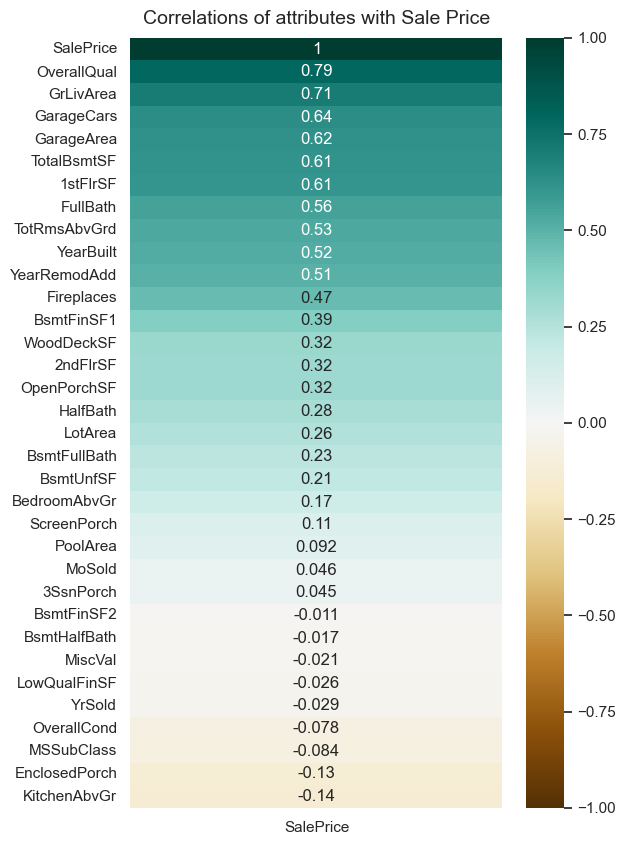

In [12]:
# Consider attributes that are int64 types
train_int64 = train.select_dtypes(include = ['float64', 'int64'])
plt.figure(figsize = (6, 10))
heatmap = sns.heatmap(train_int64.corr()[['SalePrice']].sort_values(by = 'SalePrice', ascending = False), vmin = -1, vmax = 1, annot = True, cmap = 'BrBG')
heatmap.set_title('Correlations of attributes with Sale Price', fontdict = {'fontsize':14}, pad = 10)

**Data Story 1**: The distribution of sale prices is right skewed as most of the homes have a price of USD100,000-200,000, with the greatest density at around USD130,000. There is a long tail, with the upper bound at just over USD700,000. The lower bound is at USD30,000.

C:\Users\rohit\AppData\Local\Temp\ipykernel_1264\889875003.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(train[["SalePrice"]].values)


Text(0.5, 0, 'Sale Price (USD)')

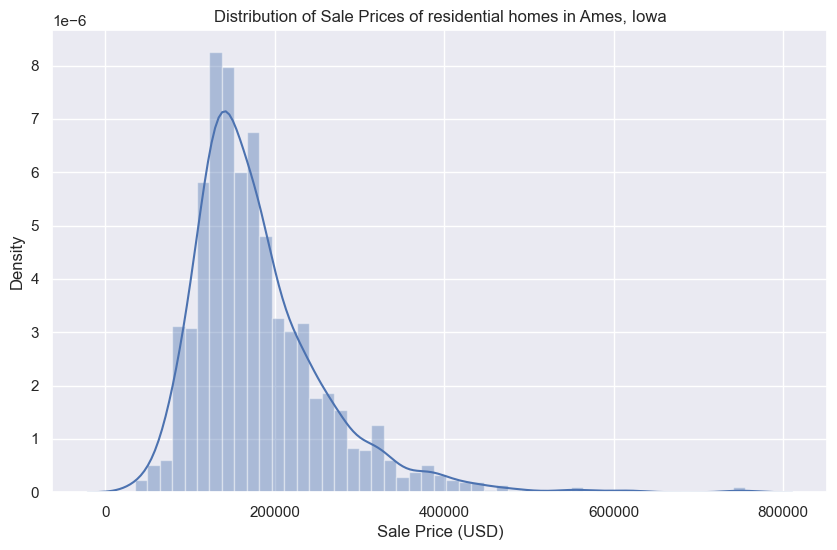

In [13]:
plt.figure(figsize = (10, 6))
ax = sns.distplot(train[["SalePrice"]].values)
ax.set_title("Distribution of Sale Prices of residential homes in Ames, Iowa")
ax.set_xlabel("Sale Price (USD)")

**Data Story 2**: The prices fluctuate periodically between 1870 to 1950 but remains centered around a constant figure. From 1950 to the present, there is clear increase in the price with small tremors as the price changed from year to year.

Text(0.5, 0, 'Year Built')

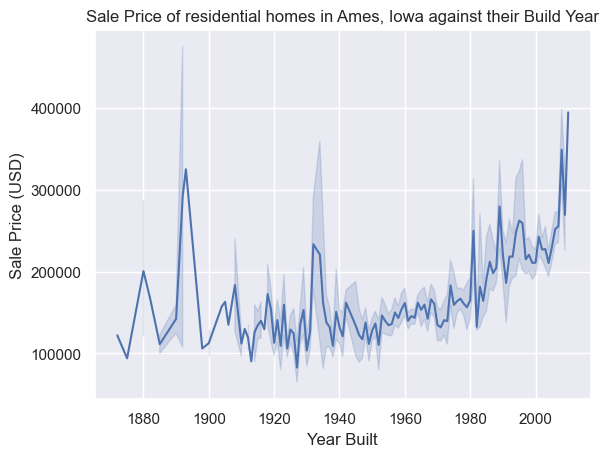

In [14]:
ax = sns.lineplot(x = "YearBuilt", y = "SalePrice", data = train)
ax.set_title("Sale Price of residential homes in Ames, Iowa against their Build Year")
ax.set_ylabel("Sale Price (USD)")
ax.set_xlabel("Year Built")

**Data Story 3**: plot a categorical against salesprice

**Data Story 4**: plot a categorical against salesprice

**Data Story 5**: Most building types have a similar median ground living area at around 1,500 ft^2 and spread, with the duplex type having a median of just under 2,000 ft^2. Single-family type dwellings have the greatest spread in living area with the lowest and highest figures. Likewise, this style also seems to be the most common as there are more homes with living areas above the upper-quartile compared to the other types.

Text(0.5, 0, 'Building Type')

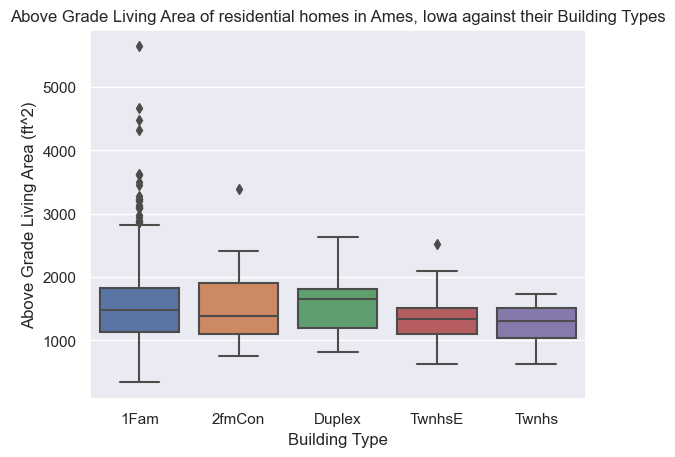

In [15]:
ax = sns.boxplot(x = "BldgType", y = "GrLivArea", data = train)
ax.set_title("Above Grade Living Area of residential homes in Ames, Iowa against their Building Types")
ax.set_ylabel("Above Grade Living Area (ft^2)")
ax.set_xlabel("Building Type")

**Data Story 6**: There seems to be a positive relationship between the overall quality of materials used for a home and the size of its garage. The plot shows that most homes have a quality of 6 and 7, with garage areas ranging between 400-600 ft^2 and exhibiting right-skewness.

<Figure size 800x1000 with 0 Axes>

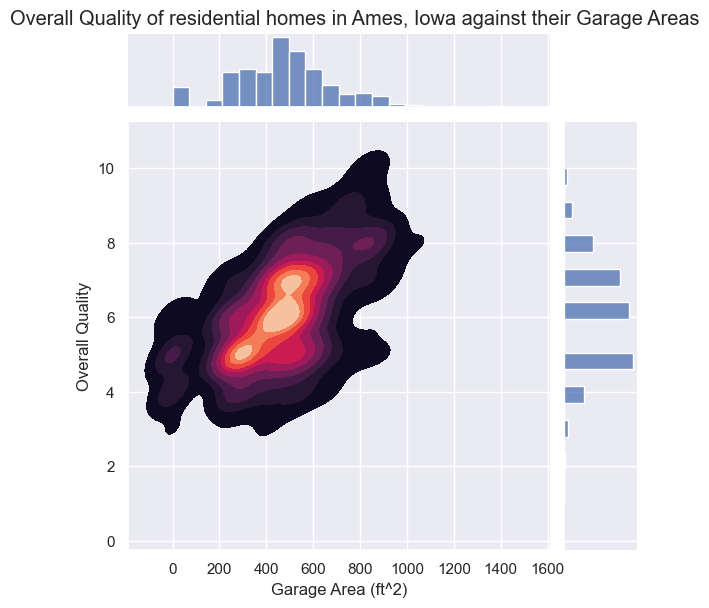

In [16]:
plt.figure(figsize = (8, 10))
ax = sns.JointGrid(x = "GarageArea", y = "OverallQual", data = train)
ax.plot_joint(sns.kdeplot, fill = True, cmap = "rocket")
ax.plot_marginals(sns.histplot, bins = 20)
ax.fig.suptitle("Overall Quality of residential homes in Ames, Iowa against their Garage Areas", y = 1.01)
ax.set_axis_labels("Garage Area (ft^2)", "Overall Quality")

**Data Story 7**: After disregarding the outliers for 1st floor area, it is clear that the feature has a positive relationship with lot area - they increase together. The contours indicate that most 1st floor areas are between 1,000-2,000 ft^2 and the lot areas are just under 10,000 ft^2. Whilst there is some scatter along the axes extremities, the grouping in the bottom left corner supports the positive trend.

Text(0.5, 0, '1st Floor Living Area (ft^2)')

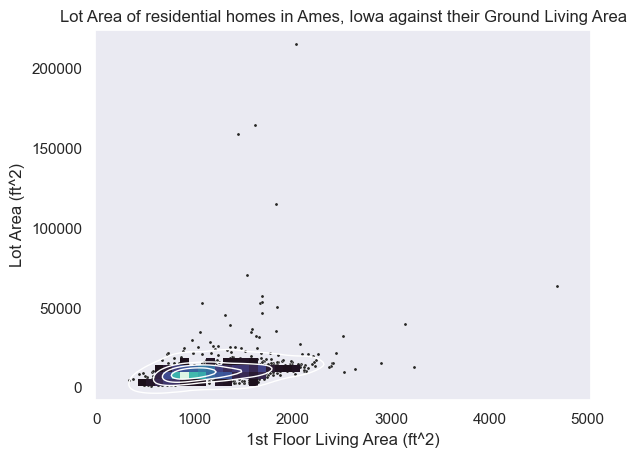

In [17]:
sns.set_theme(style = "dark")
ax = sns.scatterplot(x = "1stFlrSF", y = "LotArea", data = train, s = 5, color = ".15")
ax = sns.histplot(x = "1stFlrSF", y = "LotArea", data = train, bins = 50, pthresh = .1, cmap = "mako")
ax = sns.kdeplot(x = "1stFlrSF", y = "LotArea", data = train, levels = 5, color = "w", linewidths = 1)
ax.set_title("Lot Area of residential homes in Ames, Iowa against their Ground Living Area")
ax.set_ylabel("Lot Area (ft^2)")
ax.set_xlabel("1st Floor Living Area (ft^2)")

Text(0.5, 0, '1st Floor Living Area (ft^2)')

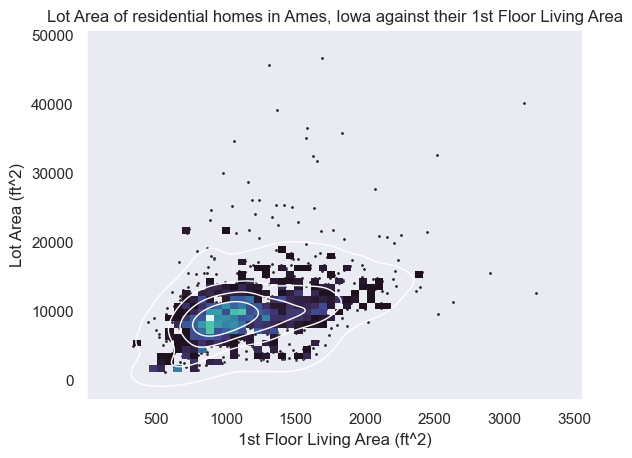

In [18]:
# Ignore outliers where lot area is greater than 50000
target = train[train.LotArea < 50000]
ax = sns.scatterplot(x = "1stFlrSF", y = "LotArea", data = target, s = 5, color = ".15")
ax = sns.histplot(x = "1stFlrSF", y = "LotArea", data = target, bins = 50, pthresh = .1, cmap = "mako")
ax = sns.kdeplot(x = "1stFlrSF", y = "LotArea", data = target, levels = 5, color = "w", linewidths = 1)
ax.set_title("Lot Area of residential homes in Ames, Iowa against their 1st Floor Living Area")
ax.set_ylabel("Lot Area (ft^2)")
ax.set_xlabel("1st Floor Living Area (ft^2)")

#### Process Data
Split the datasets into numerical and categorical variables for model creation. Some variables may also be dropped due to missing values.

In [ ]:
def splitting(data):
    
    # Select data types
    data_num = data.select_dtypes(include = ['float64', 'int64'])
    data_cat = data.select_dtypes(include = 'object')
    
    return data_num, data_cat

# Split datasets into numerical and categorical features
train_num, train_cat = splitting(train)
test_num, test_cat = splitting(test)

# Remove 'SalePrice' from training set
Y = train_num['SalePrice']
train_num = train_num.drop('SalePrice', axis = 1)

Let's gauge how many missing values are present in each column.

In [ ]:
# Find number of NaN values in each column
train.isna().sum()

In [ ]:
def dropfeatures(data):
    
    # Drop columns with over 10% missing data 
    nrow = len(data.index)
    drop = []
    for i in data.columns:
        if (data[i].isna().sum()/nrow) > 0.1:
            drop.append(i)

    dropped = data.drop(drop, axis = 1)
    
    return dropped

# Drop relevant features from both numerical sets
train_num = dropfeatures(train_num) 
test_num = dropfeatures(test_num)

#### Feature Engineering
Create new features to enhance the number options for model creation.

In [ ]:
# Find useful ratios between existing features and add them to both numerical sets
train_num['LivingAgainstLotArea'] = train_num['GrLivArea'] / train_num['LotArea']
train_num['AreaPerRoom'] = train_num['GrLivArea'] / train_num['TotRmsAbvGrd']

test_num['LivingAgainstLotArea'] = test_num['GrLivArea'] / test_num['LotArea']
test_num['AreaPerRoom'] = test_num['GrLivArea'] / test_num['TotRmsAbvGrd']

# ADD 2 MORE FEATURES

#### Transform data
Impute missing values, encode categorical data, and merge all data types to create a complete dataset.

In [ ]:
# Identify numerical features with missing values in training set
train_num.isnull().sum()

In [ ]:
# Identify numerical features with missing values in testing set
test_num.isnull().sum()

In [ ]:
# Transform numerical variables
def imputing(data):
    
    # Create pipeline to carry out transformations
    pipe = Pipeline([('imputer', SimpleImputer(strategy = 'mean')),
                    ('std_scaler', StandardScaler()),
                    ('minmax', MinMaxScaler())])
    
    imp = pd.DataFrame(pipe.fit_transform(data), columns = data.columns, index = data.index)
     
    return imp
       
# Transform training set    
train_num_imp = imputing(train_num)
train_num_imp.isnull().sum()

# Transform testing set
test_num_imp = imputing(test_num)
test_num_imp.isnull().sum()

In [ ]:
# Identify categorical features with NAs in training set
train_cat.isnull().sum()

In [ ]:
# Identify categorical features with NAs in testing set
test_cat.isnull().sum()

In [ ]:
# Transform categorical variables
def replaceNA(data, cols, mode):
    
    for i in data.columns:
        if i in cols:
            data[i].fillna(mode[i][0], inplace = True)
        else:
            data[i].fillna('None', inplace = True)
            
    return data

# Only 'Electrical" has no NA option in the data description and hence must be imputed
cols = ['Electrical']

# Use training modes for both datasets
train_cat = replaceNA(train_cat, cols, train_cat.mode())      

# Encode all features
encoder = OneHotEncoder(sparse = False, handle_unknown = 'ignore')
train_trans = encoder.fit_transform(train_cat)
train_cat_enc = pd.DataFrame(train_trans, columns = encoder.get_feature_names())

In [ ]:
# There are quite a few features that need to be imputed in the test set 
cols = ['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'KitchenQual', 'Functional', 'SaleType']

# Use training modes for both datasets
test_cat = replaceNA(test_cat, cols, train_cat.mode())

# Encode categorical features in testing set (use same fit as training)
test_trans = encoder.transform(test_cat)
test_cat_enc = pd.DataFrame(test_trans, columns = encoder.get_feature_names())

In [ ]:
# Combine numerical and categorical data
train_cat_enc = train_cat_enc.set_index(train_num_imp.index)
train_merged = pd.concat([train_num_imp, train_cat_enc], axis = 1).reindex(train_num_imp.index)

test_cat_enc = test_cat_enc.set_index(test_num_imp.index)
test_merged = pd.concat([test_num_imp, test_cat_enc], axis = 1).reindex(test_num_imp.index)

#### Model Creation
Build and compare various regression models and then optimise their hyperparameters.

**Random Forest**

In [ ]:
# Adjust hyperparameters
params = [{'n_estimators': [100, 150], 'max_features': [100, 150, 175, 200]}]

# Train and predict using model
rf_reg = RandomForestRegressor()
grid = GridSearchCV(rf_reg, params, cv = 10, scoring = 'neg_root_mean_squared_error')
grid.fit(train_merged, Y)
preds = pd.DataFrame(grid.predict(test_merged), index = test_merged.index, columns = ['SalePrice'])

**AdaBoost**

In [ ]:
# Adjust hyperparameters
params = [{'learning_rate': [0.1, 0.5, 1.0, 2.0], 'n_estimators': [100, 150, 300, 500]}]

# Train and predict using model
ab_reg = AdaBoostRegressor()
grid = GridSearchCV(ab_reg, params, cv = 10, scoring = 'neg_root_mean_squared_error')
grid.fit(train_merged, Y)
preds = pd.DataFrame(grid.predict(test_merged), index = test_merged.index, columns = ['SalePrice'])

**SGD**

In [ ]:
# Adjust hyperparameters
params = [{'alpha':[0.0001, 0.1, 0.5, 1.0, 2.0, 5.0], 'max_iter': [1000, 5000, 20000]}]

# Train and predict using model
sgd_reg = SGDRegressor()
grid = GridSearchCV(sgd_reg, params, cv = 10, scoring = 'neg_root_mean_squared_error')
grid.fit(train_merged, Y)
preds = pd.DataFrame(grid.predict(test_merged), index = test_merged.index, columns = ['SalePrice'])